In [3]:
from torch import nn
import torch

device = torch.device("cpu")

class Lr(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 100, bias=True)
        self.relu = nn.ReLU()
        self.project = nn.Linear(100, 1, bias=True)
    
    def forward(self, x):
        out = self.relu(self.linear(x))
        return self.project(out)
        #return self.linear(x)
    
#x = torch.randint(0, 500, (500,1), dtype=torch.float).to(device)
# x = torch.rand(500,1).to(device)
#x = torch.rand([500,1]).to(device) 
x = torch.arange(-2,2,0.01,dtype=torch.float32).reshape(-1,1)
model = Lr().to(device)
y_true = torch.cos(6*x)
#y_true = y_true.to(device)
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
for i in range(30000):
    y_pred = model(x)
    # define loss
    loss = loss_fn(y_true, y_pred)
    # backward
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    if (i+1) % 500 == 0:
        #print(f"weight is: {model.linear.weight.item()}, bias is: {model.linear.bias.item()}, loss is: {loss.item()}")
        print(f"loss is: {loss.item()}")




loss is: 0.2924875020980835
loss is: 0.21080273389816284
loss is: 0.1640905886888504
loss is: 0.13686665892601013
loss is: 0.11984647810459137
loss is: 0.10818114131689072
loss is: 0.09926750510931015
loss is: 0.09167452156543732
loss is: 0.08495254814624786
loss is: 0.07886626571416855
loss is: 0.07314231246709824
loss is: 0.06760536134243011
loss is: 0.062299709767103195
loss is: 0.05728831887245178
loss is: 0.05256772041320801
loss is: 0.04811974987387657
loss is: 0.04394076019525528
loss is: 0.04004435986280441
loss is: 0.03641418367624283
loss is: 0.03305495157837868
loss is: 0.029966263100504875
loss is: 0.027125364169478416
loss is: 0.02453642524778843
loss is: 0.022183476015925407
loss is: 0.020047279074788094
loss is: 0.018126724287867546
loss is: 0.01639433391392231
loss is: 0.01483745127916336
loss is: 0.01345005165785551
loss is: 0.012206063605844975
loss is: 0.011096610687673092
loss is: 0.010107286274433136
loss is: 0.009225773625075817
loss is: 0.008437979966402054
loss 

### 画出原始以及拟合的函数曲线曲线

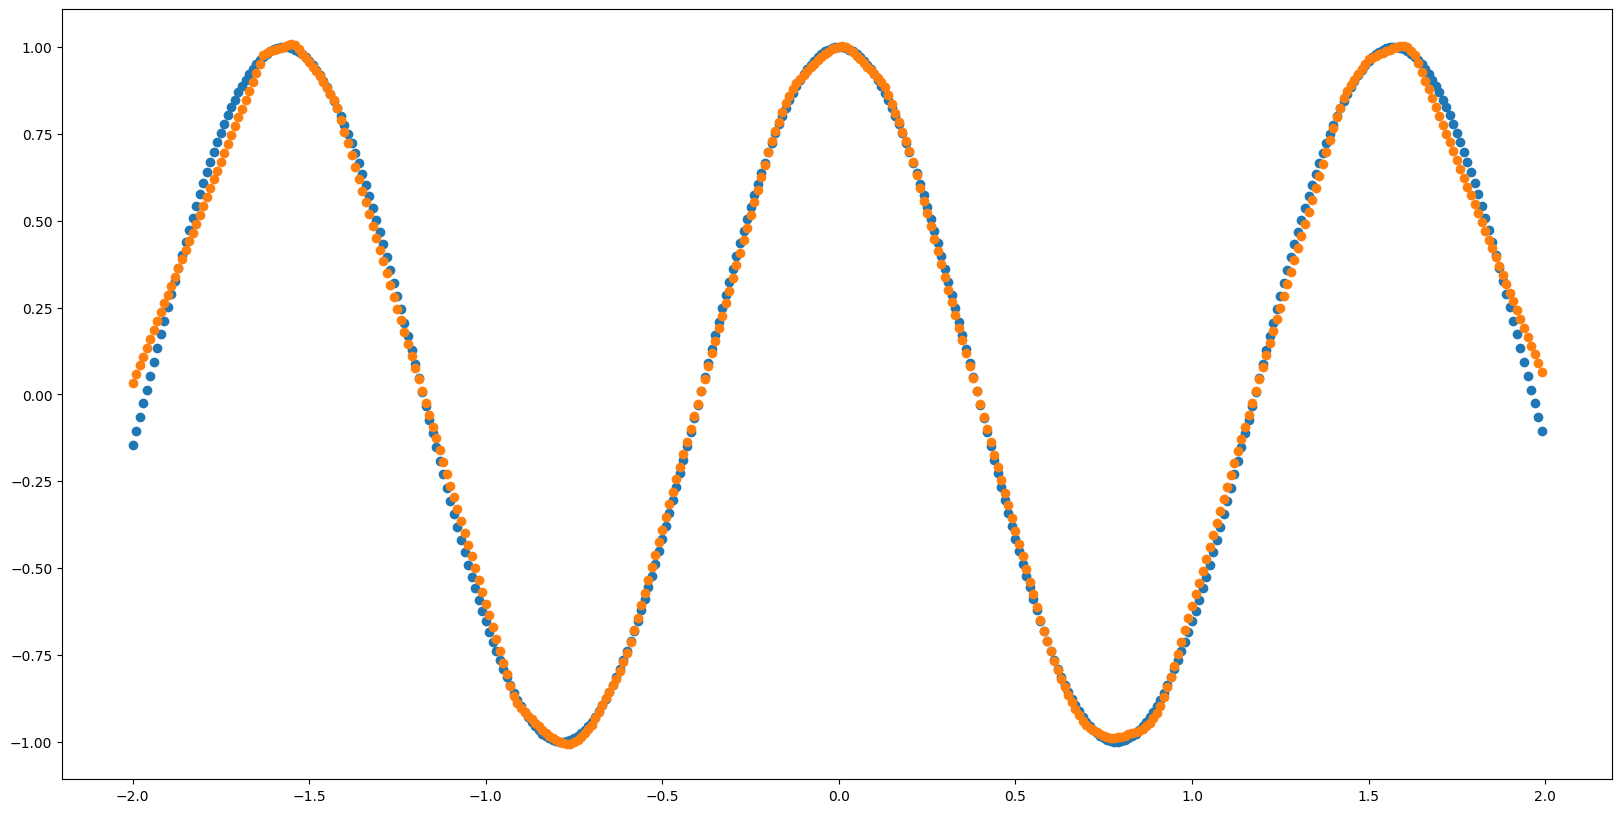

In [4]:

import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
# print(f"x size is {x.numpy().size}, y size is {y_true.numpy().size}")
plt.scatter(x.numpy().reshape(-1),y_true.numpy().reshape(-1))
y_pred = model(x)
plt.scatter(x.numpy().reshape(-1),y_pred.detach().numpy().reshape(-1))
plt.show()